# Engineer the features


<a name="sumario"></a>
# Sumário
<!--ts-->
   * [Importe das Bibliotecas](#import)
   * [Leitura dos dados](#leitura)
   * [Escalar o AGE_PERCENTIL](#age)
   * [Features com alta correlação](#corr)
<!--te-->

<a name="import"></a>
# Importe das Bibliotecas

## Bibliotecas Externas

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Bibliotecas Internas

In [2]:
import sys
sys.path.insert(1, "../src/")
from features import scale_age_percentil

-----------------
Retornar ao [Sumário](#sumario)

<a name="leitura"></a>
# Leitura dos dados
Faz a leitura dos dados que serão usados para a limpeza e futura modelagem.<br>
**```df : pd.DataFrame```** é o DataFrame que receberá os valores *raw* baixados do Kaggle.

In [14]:
# Leitura do raw data desse  projeto no Github
df = pd.read_csv('../data/interim/df_7_cleaned.csv', index_col='PATIENT_VISIT_IDENTIFIER')

# Imprime na tela todas as colunas em vez de as 10 primeiras e 10 ultimas
pd.set_option('max_columns', df.shape[1])
df.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,0.158537,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.203354,-0.219512,-0.959849,-0.828421,-0.729239,-0.836100,-0.784714,-0.170732,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.358491,0.304878,-0.959849,1.000000,-0.702202,-0.641079,-0.812725,-0.170732,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.

<a name="age"></a>
# Escalar o AGE_PERCENTIL
A *feature* chamada ```AGE_PERCENTIL``` é uma *feature* categórica. A categoria funciona da seguinte maneira:<br>
Inicialmente os dados são ordenados por idade, do mais novo para o mais velho, e em seguida separados nos percentis, ex:
10th é a categoria que representa os 10% de pacientes com a menor idade, já o 20th representa o intervalo de pacientes que estão entre os 10% e 20% da idade e assim por diante [veja aqui](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19/discussion/276074).<br>
Como alguns modelos não trabalham com dados categóricos, seria interessante, caso possível, transformar esse dado categórico em um valor real entre ma determinada faixa.<br>
Como alguns modelos consideram a magnitude dos valores como peso para a feature, não é razoavel ter todos os dados do dataset entre 0 - 1 ou (-1) - 1, e uma única feature estar de 0 - 100 por exemplo. Por isso iremos escalar o ```AGE_PERCENTIL``` entre 0 - 1.<br>
**```df_1_agescaled```** vai receber a resposta da função ```scale_age_percentil``` com os dados normalizados entre os valores 0 -  1. 

In [15]:
df['AGE_PERCENTIL'].value_counts()

20th          42
30th          39
40th          38
10th          36
80th          36
70th          34
50th          34
Above 90th    34
60th          30
90th          28
Name: AGE_PERCENTIL, dtype: int64

In [16]:
df_1_agescaled = scale_age_percentil(df)

In [18]:
df_1_agescaled['AGE_SCALED'].value_counts()

0.111111    42
0.222222    39
0.333333    38
0.000000    36
0.777778    36
0.666667    34
0.444444    34
1.000000    34
0.555556    30
0.888889    28
Name: AGE_SCALED, dtype: int64

-----------------
Retornar ao [Sumário](#sumario)

<a name="corr"></a>
# Features com alta correlação
Assim como na etapa de **limpeza dos dados** as *features* duplicadas foram removidas, assim também *features* que tem uma alta correlação entre sí podem ser removidas do modelo, de maneira a sintetizar ainda mais o DataFrame que vai gerar o modelo, removendo do modelo potenciais fontes de erro.
Vamos utilizar aqui o valor de **0,9** como limiar de aceitação. Valores a cima de **0,9** de correlação serão removidos do DataFrame.

<AxesSubplot:>

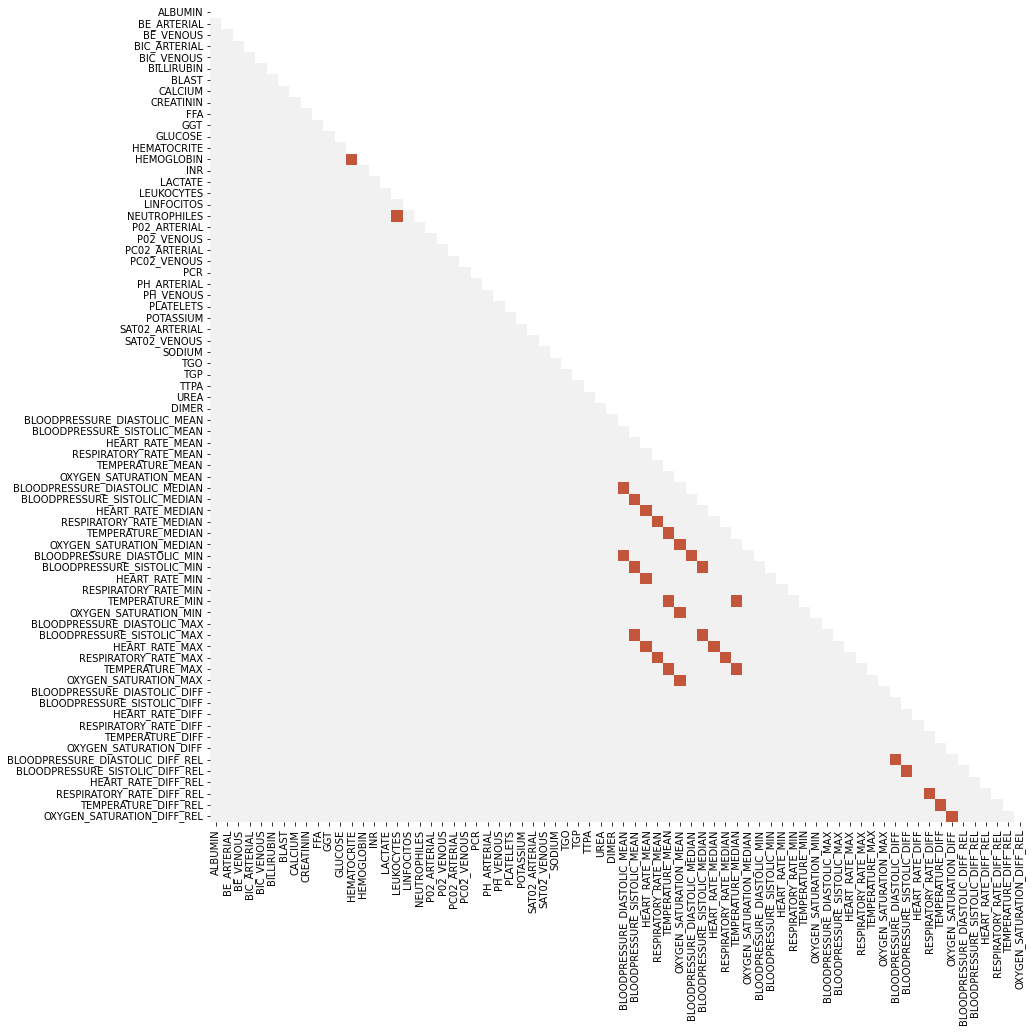

In [34]:
# Compute the correlation matrix
corr = df_1_agescaled.iloc[:,12:-2].corr().abs()
masked_corr = corr
masked_corr[corr <= 0.95] = 0
masked_corr[corr > 0.95] = 1

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(masked_corr, mask=mask, cmap=cmap, center=0, square=True, vmin=0, vmax=1.0, cbar=False)

In [35]:
upper_tri = masked_corr.where(np.triu(np.ones(masked_corr.shape),k=1).astype(np.bool))
correlated = []
for i in range(72):
    for j in range(72):
        if upper_tri.iloc[i,j] > 0.95:
            print(f'{upper_tri.index[i]} x {upper_tri.columns[j]}')
            correlated.append([upper_tri.index[i], upper_tri.columns[j]])

HEMATOCRITE x HEMOGLOBIN
LEUKOCYTES x NEUTROPHILES
BLOODPRESSURE_DIASTOLIC_MEAN x BLOODPRESSURE_DIASTOLIC_MEDIAN
BLOODPRESSURE_DIASTOLIC_MEAN x BLOODPRESSURE_DIASTOLIC_MIN
BLOODPRESSURE_SISTOLIC_MEAN x BLOODPRESSURE_SISTOLIC_MEDIAN
BLOODPRESSURE_SISTOLIC_MEAN x BLOODPRESSURE_SISTOLIC_MIN
BLOODPRESSURE_SISTOLIC_MEAN x BLOODPRESSURE_SISTOLIC_MAX
HEART_RATE_MEAN x HEART_RATE_MEDIAN
HEART_RATE_MEAN x HEART_RATE_MIN
HEART_RATE_MEAN x HEART_RATE_MAX
RESPIRATORY_RATE_MEAN x RESPIRATORY_RATE_MEDIAN
RESPIRATORY_RATE_MEAN x RESPIRATORY_RATE_MAX
TEMPERATURE_MEAN x TEMPERATURE_MEDIAN
TEMPERATURE_MEAN x TEMPERATURE_MIN
TEMPERATURE_MEAN x TEMPERATURE_MAX
OXYGEN_SATURATION_MEAN x OXYGEN_SATURATION_MEDIAN
OXYGEN_SATURATION_MEAN x OXYGEN_SATURATION_MIN
OXYGEN_SATURATION_MEAN x OXYGEN_SATURATION_MAX
BLOODPRESSURE_DIASTOLIC_MEDIAN x BLOODPRESSURE_DIASTOLIC_MIN
BLOODPRESSURE_SISTOLIC_MEDIAN x BLOODPRESSURE_SISTOLIC_MIN
BLOODPRESSURE_SISTOLIC_MEDIAN x BLOODPRESSURE_SISTOLIC_MAX
HEART_RATE_MEDIAN x HEART_RA

<ipython-input-35-51e76a09787c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = masked_corr.where(np.triu(np.ones(masked_corr.shape),k=1).astype(np.bool))
